In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

# Working with ONE molecule

# MOL object

In [2]:
#Chem.MolFromMol2Block
#Chem.MolFromMol2File
#Chem.MolFromMolBlock
#Chem.MolFromMolFile

### Valid molecules are objects

In [3]:
mol = Chem.MolFromSmiles('Cc1cccNcc1O')
#mol = Chem.MolFromSmiles('O=C(NCc1ccnc(Oc2ccc(F)cc2)c1)c1[nH]nc2c1CCCC2')

In [4]:
mol

### Invalid molecules are None

In [6]:
m2 = Chem.MolFromSmiles('c1cc1')

[16:42:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2



In [7]:
m2

In [8]:
m2 == None

True

In [9]:
mol == None

False

# Attributes

In [10]:
mol.GetNumAtoms()

9

In [11]:
for atom in mol.GetAtoms():
    print(atom.GetAtomicNum())
    print(atom.GetFormalCharge())
    print(atom.GetMass())
    print(atom.GetDegree())
    print()

6
0
12.011
1

6
0
12.011
3

6
0
12.011
2

6
0
12.011
2

6
0
12.011
2

7
0
14.007
2

6
0
12.011
2

6
0
12.011
3

8
0
15.999
1



In [12]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.InstallIPythonRenderer()

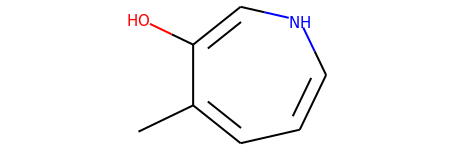

In [13]:
mol

In [14]:


def add_atom_index(molecule):
    
    m = Chem.Mol(molecule)
    
    n_atoms = m.GetNumAtoms()
    for atom in m.GetAtoms():
        atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
    return m

In [15]:
mm = add_atom_index(mol)

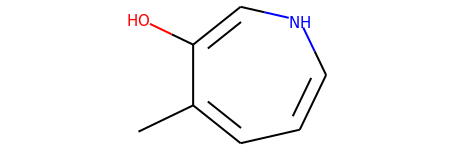

In [16]:
mol

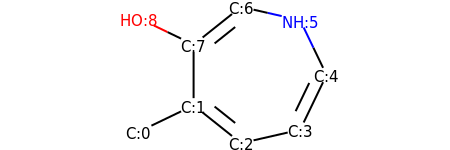

In [17]:
mm

# SMILES

In [18]:
Chem.MolToSmiles(mol)

'CC1=CC=CNC=C1O'

### For example, which molecules do these SMILES represent?

In [19]:
smiles_1 = 'C1CCCCC1'

smiles_2 = 'O1CCOCC1'

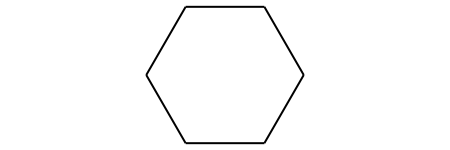

In [20]:
Chem.MolFromSmiles(smiles_1)

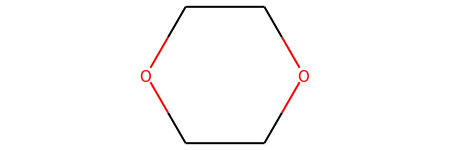

In [21]:
Chem.MolFromSmiles(smiles_2)

### And this one?

In [22]:
smiles_3 = 'C1CCCC2CCCCC12'

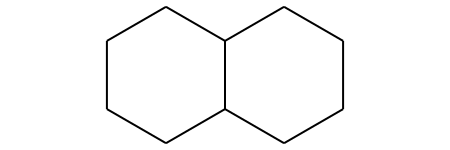

In [23]:
Chem.MolFromSmiles(smiles_3)

### Aromatic bonds can be included with lower case letters

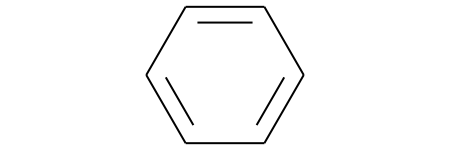

In [24]:
Chem.MolFromSmiles('c1ccccc1')

### Steroechemistry

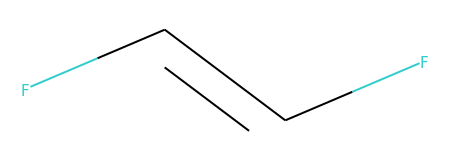

In [25]:
Chem.MolFromSmiles('F/C=C/F')

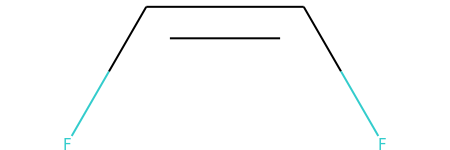

In [26]:
Chem.MolFromSmiles('F/C=C\F')

### Non-bonded compunds

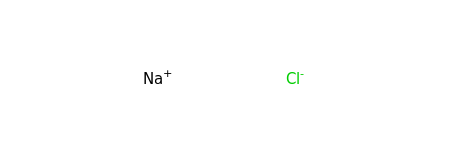

In [27]:
Chem.MolFromSmiles('[Na+].[Cl-]')

# Fingerprints

In [28]:
IPythonConsole.UninstallIPythonRenderer()

In [37]:
mol

### Morgan fingerprints

In [40]:
morgan_fps = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=1024)

In [44]:
morgan_fps.ToBitString()

'000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000100000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000010000000000000000000000000001000000000000000000100000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000100000000000000000000100000000000100000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000100000000000000000000110000000000000000000000000000000000000000100000000000100000000100000000000000000000000000000000000001000100000000000010000000000000000000000000000000000000100000000001000001000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [47]:
list(morgan_fps)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [48]:
import numpy as np

In [49]:
np.array(morgan_fps)

array([0, 0, 0, ..., 0, 0, 0])

# Tanimoto

In [54]:
from rdkit import DataStructs

In [67]:
mol1 = Chem.MolFromSmiles('c1ccccn1')
mol2 = Chem.MolFromSmiles('c1ccco1')

bit1 = {}
bit2 = {}

fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1,radius=3, nBits=2048, bitInfo=bit1)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, radius=3, nBits=2048, bitInfo=bit2)

In [68]:
DataStructs.TanimotoSimilarity(fp1,fp2)

0.11764705882352941

In [69]:
DataStructs.TanimotoSimilarity(fp1,fp1)

1.0

In [74]:
bit1

{378: ((5, 0),),
 383: ((5, 2),),
 389: ((2, 2),),
 437: ((0, 2), (4, 2)),
 1018: ((5, 3),),
 1088: ((1, 1), (2, 1), (3, 1)),
 1155: ((3, 2), (1, 2)),
 1603: ((5, 1),),
 1866: ((4, 1), (0, 1)),
 1873: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0))}

In [77]:
IPythonConsole.InstallIPythonRenderer()

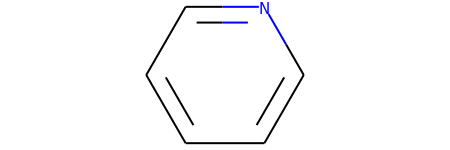

In [79]:
mol1

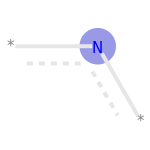

In [78]:
Chem.Draw.DrawMorganBit(mol1,378, bit1)

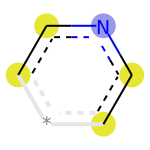

In [82]:
Chem.Draw.DrawMorganBit(mol1,383, bit1)

In [85]:
# all at once

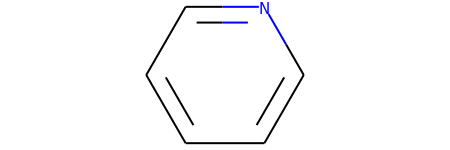

In [94]:
mol1

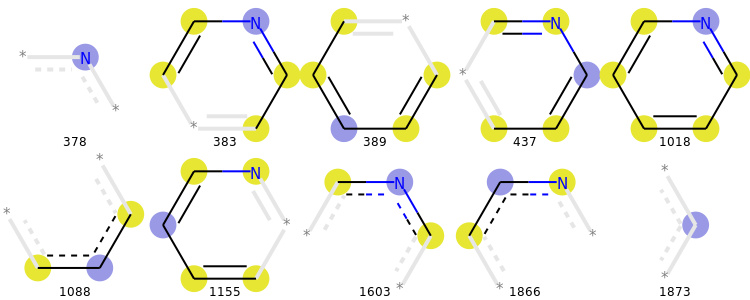

In [90]:
tpls = [(mol1,x,bit1) for x in fp1.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=5,legends=[str(x) for x in fp1.GetOnBits()])

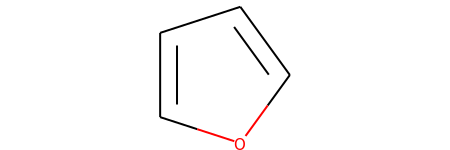

In [93]:
mol2

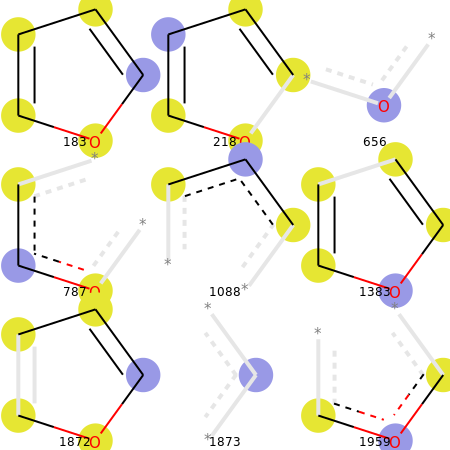

In [92]:
tpls = [(mol2,x,bit2) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=3,legends=[str(x) for x in fp2.GetOnBits()])

# Reading several molecules at the same time

In [ ]:
# From smiles

In [ ]:
# From sdf